### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

### Load the datasets and add headers

In [2]:
ratings = pd.read_csv('u.data')

ratings.head()

,196\t242\t3\t881250949
0,186\t302\t3\t891717742
1,22\t377\t1\t878887116
2,244\t51\t2\t880606923
3,166\t346\t1\t886397596
4,298\t474\t4\t884182806


In [3]:
columns_name = ['genre','index']
genre = pd.read_csv('u.genre', header=None,sep='|',index_col=1, names=columns_name)

genre

,genre
index,
0,unknown
1,Action
2,Adventure
3,Animation
4,Children's
5,Comedy
6,Crime
7,Documentary
8,Drama


In [4]:
columns_name = ['movieID','movie_title', 'movie_date','video_release_date', 'imdb_url'] + list(genre.values[:,0])
movies = pd.read_csv('u.item',encoding='latin-1',sep='|', header=None, names=columns_name)

movies.head()

,movieID,movie_title,movie_date,video_release_date,imdb_url,unknown,Action,Adventure,Animation,Children's,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [5]:
# Drop unneeded columns

movies.drop(columns=['video_release_date','imdb_url'],inplace=True)

# Remove the year from the movie_title column 

movies['movie_date'] = movies['movie_title'].apply(lambda x: x[-5:-1])
movies['movie_title'] = movies['movie_title'].apply(lambda x: x[:-7])

movies.head()

,movieID,movie_title,movie_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [6]:
columns_name = ['userID', 'movieID', 'rating', 'timeStamp']
ratings = pd.read_csv('u.data', delimiter='\t', header=None, names=['userID', 'movieID', 'rating', 'timeStamp'])

ratings.head()

,userID,movieID,rating,timeStamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [7]:
# Merge the ratings dataset with the movies on movieID without the timeStamp column

ratings = pd.merge(ratings[['userID', 'movieID', 'rating']], movies[['movieID', 'movie_title']], how='left', left_on='movieID', right_on='movieID')

ratings.head()

,userID,movieID,rating,movie_title
0,196,242,3,Kolya
1,186,302,3,L.A. Confidential
2,22,377,1,Heavyweights
3,244,51,2,Legends of the Fall
4,166,346,1,Jackie Brown


In [8]:
columns_name=['userID','age','gender','occupation','zipcode']
users = pd.read_csv('u.user',header=None, delimiter='|', names=columns_name)

users.head()

,userID,age,gender,occupation,zipcode
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [9]:
# Null values in all datasets

ratings.isna().sum().sum(), users.isna().sum().sum(), movies.isna().sum().sum()

(0, 0, 0)

## 1. Popularity-Based

### Top 10 most watched movies

In [10]:
ratings.groupby('movie_title')['rating'].count().sort_values(ascending = False).head(10)

movie_title
Star Wars                 583
Contact                   509
Fargo                     508
Return of the Jedi        507
Liar Liar                 485
English Patient, The      481
Scream                    478
Toy Story                 452
Air Force One             431
Independence Day (ID4)    429
Name: rating, dtype: int64

### Most popular movies

In [11]:
# Sorting by mean of ratings

ratings.groupby('movie_title')['rating'].mean().sort_values(ascending=False).head(10)

movie_title
Entertaining Angels: The Dorothy Day Story    5.0
Prefontaine                                   5.0
Great Day in Harlem, A                        5.0
Star Kid                                      5.0
Aiqing wansui                                 5.0
Santa with Muscles                            5.0
Saint of Fort Washington, The                 5.0
Marlene Dietrich: Shadow and Light            5.0
They Made Me a Criminal                       5.0
Someone Else's America                        5.0
Name: rating, dtype: float64

In [12]:
Rating = pd.DataFrame(ratings.groupby('movie_title')['rating'].mean())

Rating.head()

,rating
movie_title,
,3.444444
'Til There Was You,2.333333
1-900,2.600000
101 Dalmatians,2.908257
12 Angry Men,4.344000


In [13]:
# Add counts of ratings to dataset

Rating['Num_of_Ratings'] = pd.DataFrame(ratings.groupby('movie_title')['rating'].count())

Rating.head()

,rating,Num_of_Ratings
movie_title,,
,3.444444,9
'Til There Was You,2.333333,9
1-900,2.600000,5
101 Dalmatians,2.908257,109
12 Angry Men,4.344000,125


<AxesSubplot:title={'center':'Average User Ratings'}, xlabel='Rating', ylabel='Frequency'>

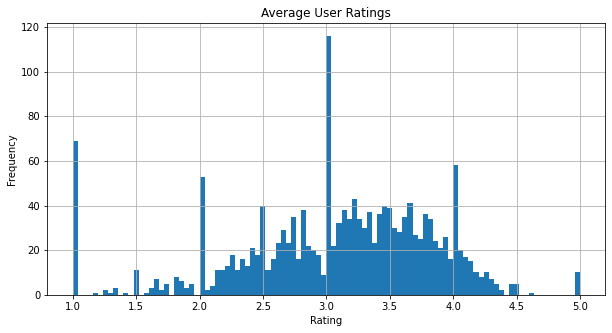

In [14]:
# Bar chart 
plt.figure(figsize=(10,5))
plt.title('Average User Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
Rating['rating'].hist(bins=100)

In [15]:
# Sort by Num_of_Ratings

Rating.sort_values('Num_of_Ratings',ascending=False).head(10)

,rating,Num_of_Ratings
movie_title,,
Star Wars,4.358491,583
Contact,3.803536,509
Fargo,4.155512,508
Return of the Jedi,4.007890,507
Liar Liar,3.156701,485
"English Patient, The",3.656965,481
Scream,3.441423,478
Toy Story,3.878319,452
Air Force One,3.631090,431


### Top 10 best movies

#### Calculating bayesian average 

In [16]:
c = Rating['rating'].mean()
c

3.0764199608361333

In [17]:
m = Rating['Num_of_Ratings'].quantile(0.85) 
m

128.0

In [18]:
def weighted_rating(x, m=m, c=c):
    a = x['Num_of_Ratings']
    b = x['rating']
    return (a/(a+m) * b) + (m/(m+a) * c)

In [19]:
Rating['CBA'] = Rating.apply(weighted_rating, axis=1)

In [20]:
# Sort by calculating bayesian average

Rating = Rating.sort_values('CBA', ascending=False)

Rating.head(10)

,rating,Num_of_Ratings,CBA
movie_title,,,
Star Wars,4.358491,583,4.127682
Schindler's List,4.466443,298,4.048783
"Shawshank Redemption, The",4.445230,283,4.018934
"Godfather, The",4.283293,413,3.997748
"Silence of the Lambs, The",4.289744,390,3.989926
Casablanca,4.456790,243,3.980544
Raiders of the Lost Ark,4.252381,420,3.977704
"Usual Suspects, The",4.385768,267,3.961473
Fargo,4.155512,508,3.938336


### Top rating by genre

In [21]:
movies.head()

,movieID,movie_title,movie_date,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,1995,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,1995,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,1995,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,1995,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [22]:
# Drop movieID and movie_date columns

movies = movies.drop(['movieID', 'movie_date'], axis=1)

In [23]:
movies.head(5)

,movie_title,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,GoldenEye,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,Four Rooms,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Get Shorty,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Copycat,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [24]:
Rating.head(5)

,rating,Num_of_Ratings,CBA
movie_title,,,
Star Wars,4.358491,583,4.127682
Schindler's List,4.466443,298,4.048783
"Shawshank Redemption, The",4.445230,283,4.018934
"Godfather, The",4.283293,413,3.997748
"Silence of the Lambs, The",4.289744,390,3.989926


In [25]:
# Merge the Rating dataset with movies on movie_title

rating_genre = pd.merge(Rating, movies, how='left', left_on='movie_title', right_on='movie_title')

rating_genre.head()

,movie_title,rating,Num_of_Ratings,CBA,unknown,Action,Adventure,Animation,Children's,Comedy,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Star Wars,4.358491,583,4.127682,0,1,1,0,0,0,...,0,0,0,0,0,1,1,0,1,0
1,Schindler's List,4.466443,298,4.048783,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,"Shawshank Redemption, The",4.445230,283,4.018934,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Godfather, The",4.283293,413,3.997748,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Silence of the Lambs, The",4.289744,390,3.989926,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
def top_by_genre(genre,n):
    x = rating_genre[genre]
    x = x[x==1]
    movies = pd.DataFrame(x, columns=[genre])
    movies = movies.join(rating_genre[['movie_title', 'CBA']])
    return movies.head(n)

In [27]:
top_by_genre('Romance',5)

,Romance,movie_title,CBA
0,1,Star Wars,4.127682
5,1,Casablanca,3.980544
9,1,Titanic,3.932598
10,1,"Empire Strikes Back, The",3.912690
13,1,"Princess Bride, The",3.862349


# 2. Content_Based

In [28]:
movie = ratings.pivot_table(index='userID', columns='movie_title', values='rating')

movie.head()

movie_title,,'Til There Was You,1-900,101 Dalmatians,12 Angry Men,187,2 Days in the Valley,"20,000 Leagues Under the Sea",2001: A Space Odyssey,3 Ninjas: High Noon At Mega Mountain,...,Wyatt Earp,Yankee Zulu,Year of the Horse,You So Crazy,Young Frankenstein,Young Guns,Young Guns II,"Young Poisoner's Handbook, The",Zeus and Roxanne,Á köldum klaka (Cold Fever)
userID,,,,,,,,,,,,,,,,,,,,,
1,4.0,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,...,NaN,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,4.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN


In [38]:
def predict_movies(movie_title):
    
    movie_rating = movie[movie_title]
    similar = movie.corrwith(movie_rating)
    
    corr = pd.DataFrame(similar, columns=['Correlation'])
    corr.dropna(inplace=True)
    corr.sort_values('Correlation', ascending=False)
    corr = corr.join(Rating['Num_of_Ratings'])
    
    predictions = corr[corr['Num_of_Ratings']>100].sort_values('Correlation',ascending=False)
    
    return predictions

In [39]:
predictions = predict_movies('Toy Story')

/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/Users/yasamin/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)


In [40]:
predictions.head(10)

,Correlation,Num_of_Ratings
movie_title,,
Toy Story,1.000000,452
"Craft, The",0.549100,104
Down Periscope,0.457995,101
Miracle on 34th Street,0.456291,101
G.I. Jane,0.454756,175
Amistad,0.449915,124
Beauty and the Beast,0.442960,202
"Mask, The",0.432855,129
Cinderella,0.428372,129


# 3. Collaborative Filtering

In [41]:
movie_user = ratings.pivot_table(index='movie_title', columns='userID', values='rating')
movie_user = movie_user.fillna(0)

movie_user.head()

userID,1,2,3,4,5,6,7,8,9,10,...,934,935,936,937,938,939,940,941,942,943
movie_title,,,,,,,,,,,,,,,,,,,,,
,4.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1-900,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101 Dalmatians,2.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,...,2.0,0.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0
12 Angry Men,5.0,0.0,0.0,0.0,0.0,4.0,4.0,0.0,0.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
# Similar movies using KNearestNeighbors

model_knn = NearestNeighbors(metric='cosine')
model_knn.fit(movie_user)

NearestNeighbors(metric='cosine')

In [43]:
distances, indices = model_knn.kneighbors(movie_user, n_neighbors=5)
distances

array([[2.22044605e-16, 5.83071588e-01, 6.14791530e-01, 6.32104432e-01,
        6.97386234e-01],
       [0.00000000e+00, 4.41485557e-01, 5.41168532e-01, 6.44590673e-01,
        6.57212807e-01],
       [0.00000000e+00, 3.42867026e-01, 3.90005719e-01, 5.51564507e-01,
        5.99972315e-01],
       ...,
       [1.11022302e-16, 6.11874657e-01, 6.13566690e-01, 6.59038749e-01,
        6.72981295e-01],
       [0.00000000e+00, 4.77767032e-01, 4.77767032e-01, 4.77767032e-01,
        4.77767032e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [44]:
movie_sim = pd.DataFrame(indices, columns=['movie0', 'movie1', 'movie2', 'movie3', 'movie4'])

movie_sim.head()

,movie0,movie1,movie2,movie3,movie4
0,0,977,813,775,249
1,1,472,1172,307,967
2,2,507,31,641,459
3,3,764,1543,1629,744
4,4,233,627,51,909


In [45]:
movie_sim.shape

(1659, 5)

In [46]:
movie_ = movie_sim.copy()
for i in range(0, 5):
    movies = pd.DataFrame(movie_user.index).reset_index()
    movies = movies.rename(columns={'index':f'movie{i}'})
    movie_ = pd.merge(movie_, movies, on=[f'movie{i}'], how='left')
    movie_ = movie_.drop(f'movie{i}', axis=1)
    movie_ = movie_.rename(columns={'movie_title':f'movie{i}'})

In [47]:
movie_.head(10) 

,movie0,movie1,movie2,movie3,movie4
0,,Mighty Morphin Power Rangers: The Movie,Killer (Bulletproof Heart),Jaws 3-D,Bushwhacked
1,'Til There Was You,Everest,Prefontaine,City of Angels,Mercury Rising
2,1-900,Faust,Aiqing wansui,Grosse Fatigue,"Enfer, L'"
3,101 Dalmatians,Jack,Twister,Willy Wonka and the Chocolate Factory,Independence Day (ID4)
4,12 Angry Men,"Bridge on the River Kwai, The","Graduate, The",Amadeus,M*A*S*H
5,187,Gang Related,How to Be a Player,Hoodlum,Fire Down Below
6,2 Days in the Valley,Things to Do in Denver when You're Dead,Primal Fear,Heat,Donnie Brasco
7,"20,000 Leagues Under the Sea",Swiss Family Robinson,Around the World in 80 Days,Mary Poppins,"Sound of Music, The"
8,2001: A Space Odyssey,Raiders of the Lost Ark,Blade Runner,"Graduate, The",Apocalypse Now
9,3 Ninjas: High Noon At Mega Mountain,Power 98,"Bloody Child, The",Paris Was a Woman,"Great Day in Harlem, A"
